In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/processed data/master_spend_cleand_data.csv')


# What are the largest individual payments (top 100 and top 20)

In [5]:
top_100 = df.nlargest(100, 'Amount')

top_20 =  top_100.sort_values('Amount' , ascending=False).head(20)


print(f"Top 100 transactions: {len(top_100)}")
print(top_20[['Date of Payment', 'Amount']])

Top 100 transactions: 100
    Date of Payment       Amount
316      2024-02-09  736000000.0
27       2024-01-03  689838000.0
377      2025-03-03  687419661.0
341      2024-02-12  580000000.0
201      2025-02-01  455000000.0
456      2024-03-06  449000000.0
159      2024-01-11  400000000.0
137      2024-01-08  387000000.0
123      2024-01-07  378000000.0
108      2025-01-05  300000000.0
109      2025-01-05  290000000.0
171      2024-02-01  290000000.0
153      2024-01-10  277000000.0
539      2024-04-03  250000000.0
172      2024-02-01  246000000.0
135      2024-01-08  225000000.0
376      2025-03-03  225000000.0
632      2025-04-06  210000000.0
74       2025-01-04  205000000.0
173      2024-02-01  200000000.0


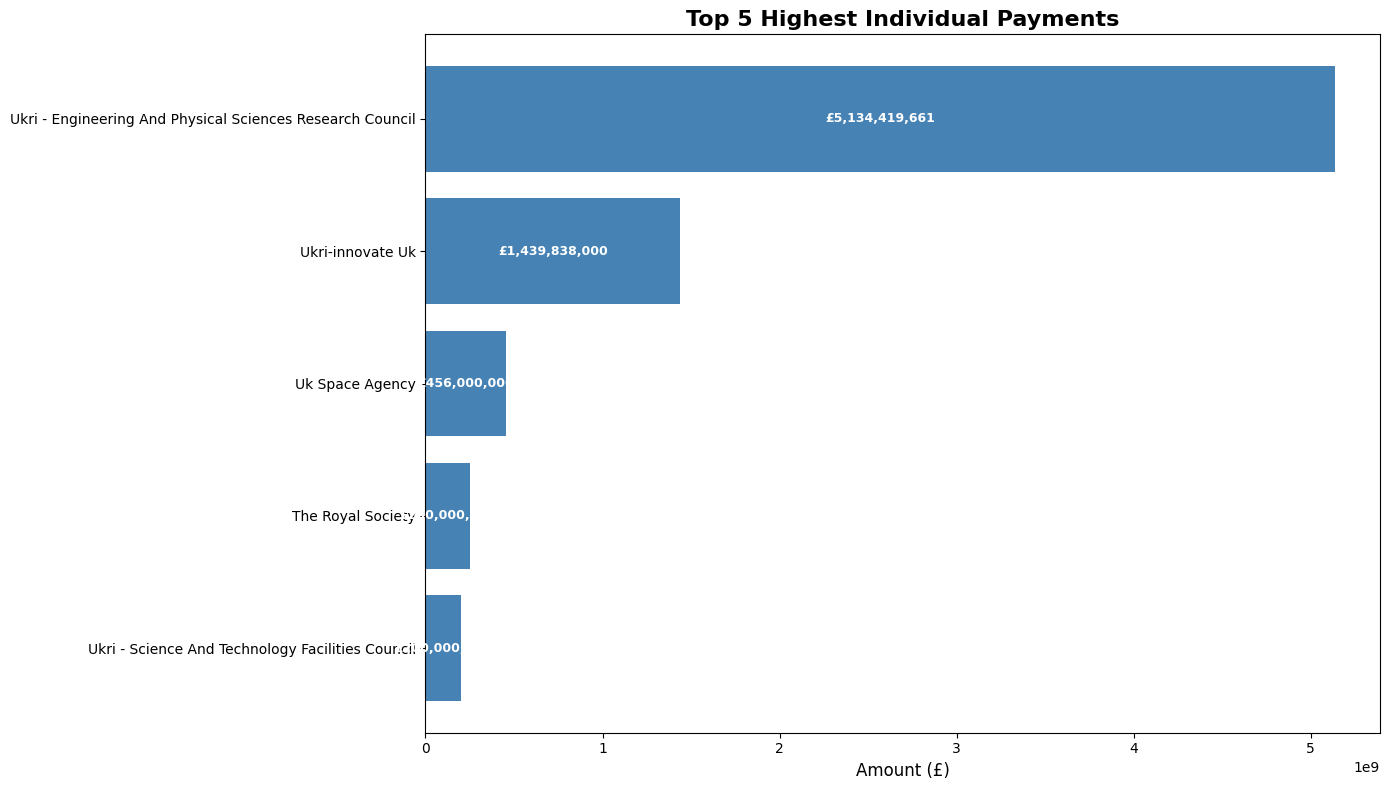

In [14]:

# Group by supplier and sum amounts first
top_20_grouped = top_20.groupby('Supplier')['Amount'].sum().reset_index()
top_20_grouped = top_20_grouped.sort_values('Amount', ascending=True).tail(20)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(top_20_grouped['Supplier'], top_20_grouped['Amount'], color='steelblue')

# Add labels and title
ax.set_title('Top 5 Highest Individual Payments', fontsize=16, fontweight='bold')
ax.set_xlabel('Amount (£)', fontsize=12)

# Add single clean label per bar
for bar, amount in zip(bars, top_20_grouped['Amount']):
    ax.text(bar.get_width() * 0.5, bar.get_y() + bar.get_height()/2,
            f'£{amount:,.0f}', va='center', ha='center',
            fontsize=9, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Who received them and for what?


In [6]:
(top_20[['Supplier', 'Amount', 'Description', 'Expense Type']])

,Supplier,Amount,Description,Expense Type
316,Ukri - Engineering And Physical Sciences Resea...,736000000.0,Dsit - Epsrc Financing-grant-in-aid To Arms Le...,Grant-in-aid To Arms Length Bodies
27,Ukri-innovate Uk,689838000.0,Dsit - Tsb Financing-grant-in-aid To Arms Leng...,Grant-in-aid To Arms Length Bodies
377,Ukri - Engineering And Physical Sciences Resea...,687419661.0,Dsit - Epsrc Financing-grant-in-aid To Arms Le...,Grant-in-aid To Arms Length Bodies
341,Ukri - Engineering And Physical Sciences Resea...,580000000.0,Dsit - Epsrc Financing-grant-in-aid To Arms Le...,Grant-in-aid To Arms Length Bodies
201,Ukri - Engineering And Physical Sciences Resea...,455000000.0,Dsit - Epsrc Financing-grant-in-aid To Arms Le...,Grant-in-aid To Arms Length Bodies
456,Ukri - Engineering And Physical Sciences Resea...,449000000.0,Dsit - Epsrc Financing-grant-in-aid To Arms Le...,Grant-in-aid To Arms Length Bodies
159,Ukri - Engineering And Physical Sciences Resea...,400000000.0,Dsit - Epsrc Financing-grant-in-aid To Arms Le...,Grant-in-aid To Arms Length Bodies
137,Ukri - Engineering And Physical Sciences Resea...,387000000.0,Dsit - Epsrc Financing-grant-in-aid To Arms Le...,Grant-in-aid To Arms Length Bodies
123,Ukri - Engineering And Physical Sciences Resea...,378000000.0,Dsit - Epsrc Financing-grant-in-aid To Arms Le...,Grant-in-aid To Arms Length Bodies
108,Ukri-innovate Uk,300000000.0,Dsit - Tsb Financing-grant-in-aid To Arms Leng...,Grant-in-aid To Arms Length Bodies


#  What patterns exist in high-value spending?


In [18]:

print(f"Total high-value spend: £{top_20['Amount'].sum():,.2f}")
print(f"Average transaction: £{top_20['Amount'].mean():,.2f}")

print("\nBy Expense Type:")
print(top_20.groupby('Expense Type')['Amount'].sum().sort_values(ascending=False))

print("\nBy Supplier Type:")
print(top_20.groupby('Supplier Type')['Amount'].sum().sort_values(ascending=False))

# AI used to print the results. 

Total high-value spend: £7,480,257,661.00
Average transaction: £374,012,883.05

By Expense Type:
Expense Type
Grant-in-aid To Arms Length Bodies                6.774258e+09
Res - Npf - Agencies - General Fund               4.560000e+08
R & D Current Grants To Private Sector - Npish    2.500000e+08
Name: Amount, dtype: float64

By Supplier Type:
Supplier Type
Vendor      5.134420e+09
Wga Only    2.095838e+09
Grant       2.500000e+08
Name: Amount, dtype: float64
